# Autoregulation and Baroreflex Regulation in Mean Arterial Blood Pressure Maintenance

Kyle Iwamoto, Emily Schueppert, Daniel Shannon, Joseph Vallin  
Final Project for CBE 30338, Spring 2017

## Introduction

   The primary methods of blood pressure control are baroreflex and autoregulation. Baroreceptors, located primarily at the carotid sinus and the aortic arch, measure information regarding systemic arterial blood pressure. Baroreceptors can sense change in blood pressure through the expansion and contraction of the arterial walls in response to increased and decreased blood pressure, respectively (Klabunde). This information is sent to the brain stem, where the information is translated into signals that are sent through the parasympathetic (vagus) and sympathetic nervous systems to alter heart rate, venous volume, and arterial resistance (Batzel).The second mechanism of blood pressure control is autoregulation. Autoregulation refers to the process where local vasculature is altered via constriction or dilation to maintain stable blood flow to the desired organ (Batzel). Autoregulation control occurs simultaneously with baroreflex feedback, but acts in opposition to baroreflex control. 

Blood pressure regulation is an essential process that occurs regularly when standing and even after traumatic events with significant blood loss (Klabunde). For example, immediately after standing the brain experiences a step decrease in blood flow and pressure. Decreased blood flow to organs, such as the brain, initiates the autoregulatpry response. Nearby blood vessels dilate to provide the brain with a constant blood flow, despite the overall decreased flow. The proportional action taken by autoregulation leads to a significant decrease in blood pressure. Decreased blood pressure leads to a contraction of the arterial walls, which decreases baroreceptor neural firing. Neurons in the brain stem sense the decrease in baroreceptor activity and the effects of autoregulation and respond by increasing sympathetic response and decreasing vagus response. The increase in sympathetic activity produces multiple effects. The resistance in arterioles and capillary beds increases as well as stroke volume due to increased venous volume. Both increased sympathetic and decreased vagus activity increase heart rate. The increased heart rate and stroke volume create an increased cardiac output. Increased vascular resistance and cardiac output help to recover the initial loss of blood pressure (Klabunde). 

The baroreflex feedback mechanism is a highly studied control mechanism due to its medical relevance and its dynamic behavior. However, many models neglect the contribution of autoregulation to blood pressure regulation. This project seeks to quantify the effects of baroreflex and autoregulation control on blood pressure due to step changes in cardiac output using systemic arterial pressure models described by Burattini. Using Python simulation and bode plot analysis, the project explores the stability of the model and the influence of the magnitude of the effective baroreflex open-loop gain on the dynamics of the pressure. 


## Theory

The model proposed by Burattini is shown in Figure 1.

##### <h4><center> Figure 1 <h4><center>
![](Theo1.png)
The following figures provide an explanation of variables in addition to an anatomic depiction of the control loop blocks. The model input is a step change in cardiac output, Q, which can occur when standing quickly, and is displayed in Figure 2. 

##### <h4><center> Figure 2 <h4><center>
![](Theory2.PNG)
The first block in the control loop describes the various gains associated with autoregulation, which occur locally near the organ of interest (brain), and is shown in Figure 3. The initial peripheral resistance within the local vasculature is defined as R0, and the initial blood flow to the brain is defined as Q0. The effects of autoregulation are quantified as a gain, $G_{ra}$, which is equal to,

##### <h4><center> Equation 1 <h4><center>
$$ G_{ra} = \frac{\Delta R}{\Delta Q} $$

where $\Delta R$ describes the change in resistance in the local vasculature in response to the sudden change in blood flow $\Delta Q$ to the organ. The change in vasculature required to maintain the initial blood flow to the brain produces a reduced pressure, $\Delta P_a$, where the subscript is used to indicate that this pressure drop is associated solely with autoregulation.

##### <h4><center> Figure 3 <h4><center>
![](Theory3.PNG)
The second block represents the feedback control provided by baroreflex, displayed in Figure 4. The activity of the baroreceptors changes as a result of the pressure drop $\Delta P_a$. The effect of baroreflex is quantified as a gain, $G_{ob}$, which is defined as 

##### <h4><center> Equation 2 <h4><center>
$$ G_{ob}=\frac{\Delta R}{-\Delta P} $$,

where R describes the change in resistance within the vasculature that results from baroreflex and $P$ is the reduction in pressure produced from the effects of autoregulation. The negative sign indicates that the change in resistance produced from baroreflex is directionally opposite of the change in pressure experienced by the baroreceptors (Burattini). Thus, a decrease in pressure experienced by the baroreceptors would lead to an increase in peripheral resistance to raise the blood pressure.

##### <h4><center> Figure 4 <h4><center>
![](Theory4.PNG)
The summing point, highlighted in Figure 5, occurs in the brain stem. The brain stem takes in the information regarding the baroreflex objective to increase blood pressure with the objective of autoregulation to maintain a constant blood flow and produces a net response. The net response is manifested in the form of a neural signal to the sinoatrial (SA) node of the heart to increase heart rate, which increases blood pressure due to the increased cardiac output.

##### <h4><center> Figure 5 <h4><center>
![](Theory5.PNG)
The model utilized in the Python simulation from Burattini condenses the model shown in Figure 1. The gains associated with both autoregulation and baroreflex are lumped into a single gain, $G_{0e}, often referred to as the effective gain. Combining the gains of autoregulation and baroreflex allows analysis of the effect of a step decrease in cardiac out on arterial pressure without the effects of blood pressure regulation. This simplified model is shown in Figure 6, and the dynamic model in the Laplace domain is shown in Figure 7. 

##### <h4><center> Figures 6 and 7 <h4><center>
![](Theory6.PNG)
As Burattini describes, a change in cardiac output, designated by $\Delta Q(s)$, is related to the mean pressure change that would occur without arterial regulation by baroreflex and autoregulation, $\Delta P_i(s)$, by the transfer function, $T(s)$ (i.e. $\Delta P_i(s)= T(s)*\Delta Q(s)$) . This transfer function highlights how changes in cardiac output with a set arterial resistance produces a change in pressure as a function of time. Assuming a 3-compartment windkessel model for the arterial pressure, which describes how the mechanics of the heart affect arterial pressure , $T(s)$ takes the form

##### <h4><center> Equation 3 <h4><center>
$$T(s) = R_0\frac{1+\tau_2 s}{1+\tau_1 s}$$

where $R_o$ is the peripheral vascular resistance and $\tau_1$ and $\tau_2$ are parameters of the Windkessel model. The contribution of control mechanisms can be quantified by using the relationship between $P_i(s)$ and $P(s)$, the arterial pressure change that occurs with regulation,

##### <h4><center> Equation 4 <h4><center>
$$\Delta P(s) = \Delta P_i(s)\frac{1}{1+H(s)} $$

The transfer function $H(s)$ is given by

##### <h4><center> Equation 5 <h4><center>
$$H(s) = \frac{G_{0e}}{(1+\tau_1s)(\frac{s^2}{\omega^2_n}+2\zeta\frac{s}{\omega_n}+1)}$$

where $G_{0e}$ is the effective open-loop gain due to total pressure regulation (baroreflex and autoregulation), $\tau_1$ is the time constant characteristic to the decrease in aortic pressure diastole, $\omega_n$ is the natural frequency, and $\zeta$ is the damping factor of the resistance regulation. $G_{0e}$ can be calculated by

##### <h4><center> Equation 6 <h4><center>
$$G_{0e} = R_0\Delta Q/\Delta P - 1$$

Where $\Delta Q$ and $\Delta P$ can both be experimentally measured as the initial respective values minus the final respective values after the new equilibrium was reached.Thus, the autoregulatory and baroflex controlled response of arterial blood pressure to a step change in cardiac output is given by

##### <h4><center> Equation 7 <h4><center>
$$P(s) = [\frac{1}{1+H(s)}T(s)]Q(s)$$

This overall transfer function is used to plot the time dependent behavior of arterial pressure after a step change in cardiac output, depicted in the following Python code and simulations. The above transfer functions are summarized in Table 1.

It is important to note that several assumptions went into the modeling equations. First, the baroreflex regulatory response is actually non-linear, however with only small disturbances in cardiac output, characteristic of most physiological cases, a linear approximation can be made to form $H(s)$.Secondly, the experimentally measured arterial pressure should theoretically account for the venous pressure by subtracting it, however venous pressure is usually low enough to neglect so that only an arterial pressure measurement is needed. Additionally, the model proposed by this project assumes steady state behavior, and that the autoregulation gain ($G_{ra}$) is constant over the range of pressures ranges studied. Finally, the baroreflex response is known to affect not only peripheral arterial resistance but also cardiac output. This was assumed to be held constant in the derivations of the equations for the ease of measurements. For this reason the oscillatory response seen in the graphs below is due to arterial resistance regulation only.

Due to experimental limitations, data was not directly taken for the following simulations. Rather, parameter values achieved by previous studies, specifically those of Burattini, were used to model this control system. A summary of all transfer functions used in the simulation is shown in Table 1.

##### <h4><center> Table 1 <h4><center>
| Transfer Function | Description |
 | :------- | :----: | :---: | :---- | 
 | $T(s) = R_0\frac{1+\tau_2 s}{1+\tau_1 s}$ |Generalized Transfer Function of the Windkessel Arterial Load|
 | $G_{0e} = R_0\Delta Q/\Delta P - 1$ | The effective open loop gain of regulation|
 | $H(s) = \frac{G_{0e}}{(1+\tau_1s)(\frac{s^2}{\omega^2_n}+2\zeta\frac{s}{\omega_n}+1)}$ | Pressure to Pressure Open Loop Transfer Function | 
 | $\Delta P(s) = \Delta P_i(s)\frac{1}{1+H(s)} $ | Mean Pressure Change |
 | $P(s) = [\frac{1}{1+H(s)}T(s)]Q(s)$ | Final Mean Arterial Pressure |  



#### Comparison of Types of Blood Pressure Regulation 

Blood pressure is regulated by both autoregulation and baroregulation which counteract each other. Baroreflex regulation increases the mean arterial blood pressure (MAP) while autoregulation decreases the MAP. Autoregulation is an intrinsic ability of organs to control local perturbations in blood flow within the blood vessels in the organ. Baroregulation, however, occurs through the a negative feedback loop from the baroreceptors to the medulla, which translates the information into signals that are transmitted through the parasympathetic and sympathetic nervous systems to alter heart rate, venous volume, and arterial resistance.

Figure 8 shows the relationship between MAP and cardiac output depending upon the control mechanism. The figure demonstrates exactly the physical effects of each type of regulation and that pressure and flowrate have a linear relationship when no control is utilized. Table 2 shows the values extracted from mean experimental data that were used in the model.

#### <h4><center> Table 2 <h4><center>

 | Quantity | Symbol | Value | Units |
 | :------- | :----: | :---: | :---- | |
 | Nominal Pressure | $P_0$ | 123 +/- 15 | $mmHg$ |
 | Nominal Cardiac Output | $Q_0$ | 2.70 +/- 0.47| $L/min$ |
 | Zero Flow Pressure | $P_{zf}$ | 12.4 +/- 10.1 | $mmHg$ |
 | Gain of Autoregulation Resistance | $G_{ra}$ | 13.0 +/- 3.46 | $mmHg*min^2/L^2$ |
 | Gain of Baroregulation Resistance | $G_{rb}$ | 0.827 +/- 0.255 | $ min/L $| 

/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/jeff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in true_divide


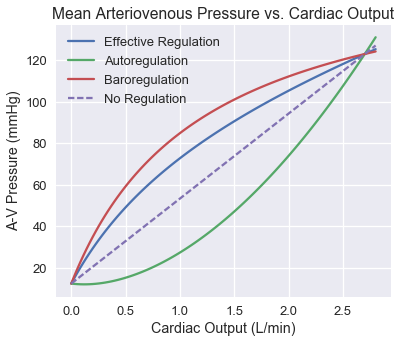

In [4]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

sns.set_context('talk')

# needed to avoid a deprecation warning in the control library 
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
# Initialize Parameters
Q_0 = 2.70   # L/min
P_0 = 123    # mmHg
G_rb = 0.827 # min/L
G_ra = 13.0  # mmHg*min^2/L^2
P_zf = 12.4  # mmHg
Q = np.linspace(0,2.8,100) # L/min

# Solve for the MAP as a function of Cardiac Output

# Combined effect of autoregulation and baroreflex regulation
P = P_0*((1/Q_0+G_rb)/(1/Q+G_rb))+G_ra*((Q-Q_0)/(1/Q+G_rb))+P_zf*((1-Q/Q_0)/(1+G_rb*Q)) # mmHg

# Only Autoregulation (G_rb = 0)
P_auto = P_0*((1/Q_0)/(1/Q))+G_ra*((Q-Q_0)/(1/Q))+P_zf*((1-Q/Q_0)/(1+Q)) # mmHg

# Only Baroreflex regulation (G_ra = 0)
P_baro = P_0*((1/Q_0+G_rb)/(1/Q+G_rb))+P_zf*((1-Q/Q_0)/(1+G_rb*Q)) # mmHg

# No regulation (G_rb = G_ra = 0)
P_none = P_0*((1/Q_0)/(1/Q))+P_zf*((1-Q/Q_0)/(1)) # mmHg

# Plot the Responses
plt.figure(figsize=(6,5))
plt.plot(Q,P,Q,P_auto,Q,P_baro,Q,P_none,'--')
plt.title('Mean Arteriovenous Pressure vs. Cardiac Output')
plt.xlabel('Cardiac Output (L/min)')
plt.ylabel('A-V Pressure (mmHg)')
plt.legend(['Effective Regulation','Autoregulation','Baroregulation','No Regulation'],loc = 0)


So, autoregulation effectively reduces blood pressure while baroreflex regulation increases blood pressure. Autoregulation focuses on increasing cardiac output, and baroregulation reduces cardiac output and increases pressure. The line representing "No Regulation" shows that pressure and cardiac output, or blood flow rate, are linearly relate in the absence of regulation. However, the solid blue line shows that the effective regulation between autoregulation and baroreflex regulation. The effective regulation is dominated by baroreflex regulation, but nonetheless autoregulation counteracts baroreflex regulation and lowers the effective regulation. So the gain governing baroreflex regulation is larger when autoregulation is accounted for because it desires to reach a desired pressure output but has to combat against autoregulation.This phenomena was shown in Burattini's study, "Systemic Autoregulation Counteracts the Carotid Baroreflex", where the gain of baroregulation was 40% higher when autoregulation was accounted for.

## Computational Modeling and Analysis

A Summary of the Parameter values that are used in the following simulation are displayed in Table 3.

##### <h4><center> Table 3 <h4><center>
 | Quantity | Symbol | Value | Units |
 | :------- | :----: | :---: | :---- | |
 | Reference Peripheral Resistance | $R_0$ | 0.54 | $mmHg*min/mL^{-1}$ |
 | Windkessel Time Constant 1 | $\tau_1$ | 1.1| $s$ |
 | Windkessel Time Constant 2 | $\tau_2$ | 0.063| $s$ |
 | Open-Loop Baroreflex Regulation Gain | $G_{ob}$ | 3.3 | $dimensionless$ |
 | Natural Pulsation Frequency | $\omega$ | 0.4 | $ rad/s $| 
 | Damping Ratio | $\zeta$ | 0.4 | $dimensionless$ |
 | Nominal Mean Arterial Pressure | $P_{MAP}$ | 144| $mmHg$ |
 | MAP Change w/o Baroregulation | $P_{ia}$ | 53.9 | $mmHg$ |
 | Autoregulation Resistance Gain | $G_{ra}$ | 20.3 | $ dimensionless $|
 | Nominal Blood Flow | $Q_0$ | 19.8 | $ mL/min $|

In [5]:
# Model for the Combined Control Action of Baroregulation and Autoregulation

# Open-Loop Transfer Function Parameters taken from Burattini, et al.
# The values reflect steady-state canid conditions.

#Reference value of total peripheral resistance
R_0 = 0.54      #mmHg min mL^-1

#Windkessel time constant 1
tau1 = 1.1      # sec

#Windkessel time constant 2
tau2 = 0.063    # sec

#Effective baroreflex open-loop gain
G_0e = 1.4      #dimensionless

#Natureal Pulsation frequency
omega = 0.4     #rad s^-1

#Damping Ratio
zeta = 0.4      #dimensionless

#Mean arterial pressure setpoint
meanP = 140     #mmHg

#Mean cardiac output change
delQ = 20       #mL min^-1

#"t" is the time vector consisting of 1,000 points from 0 to 80 seconds
t = np.linspace(0,80,1000)

# The function "TF" takes an input of the overall effective gain and returns the overall transfer function
# that corresponds with this value of "G_0e". This function also returns the transfer function "Ts", and
# the value of the effective gain "G_0e". "TF" relates a change in cardiac output—which is expressed in
# units of mL min^-1—to a change in the arterial pressure—which is expressed in mmHg. This function also
# returns "Hs" for the Bode model.
def TF(G_0e = 1.4):
    # "Ts" is the generalized transfer function of the windkessel arterial load
    Ts = R_0 *control.tf([tau2,1],[tau1,1])
    # "Hs" is the pressure-to-pressure open loop transfer function, which is the prodect of the transfer 
    # functions "Es" and "Js"
    Es = control.tf([0,1],[tau1,1])
    Js = control.tf([0,G_0e],[1/omega**2,2*zeta/omega,1])
    
    Hs = Js*Es

    # "Ds" is the transfer function relating the change in pressure with the cardiac output disturbance
    Ds = 1/(1+Hs)

    # "Gs" is the overall transfer function relating "Ts" with "Hs"
    Gs = Ds*Ts
    return Gs, Ts, G_0e, Hs

# The function "stepResponse" takes an input for the transfer function for the closed-loop control model.
# The transfer function "Gs" relates a change in the cardiac output with a resultant change in arterial
# pressure. The function plots the pressure profile corresponding with a stepwise reduction or increase
# in the cardiac output, and this pressure profile is plotted over a time vector "t".
# The inputs for the function are the transfer function "Gs", the transfer function for the Windkessel
# arterial load, the value of the effective gain "G_0e", the value of the change in the cardiac output
# "delQ", and the time vector "t". 
def stepResponse(Gs, Ts, G_0e, delQ, t):
    # "delP" is the vector correpsonding with the controlled pressure response, involving the overall
    # transfer function "Gs".
    delP,t = control.step(Gs,t)
    # "delP_no_control" is the vector correpsonding with an uncontrolled pressure response, involving 
    # only the Windkessel arterial load transfer function "Ts", which directly correlates a change in
    # pressure with a change in cardiac output.
    delP_no_control,t = control.step(Ts,t)
    # "P" is the pressure profile that results from the step change to the cardiac output.
    P = meanP + delP*delQ
    P_no_control = meanP + delP_no_control*delQ
    # The following code plots the pressure profiles for both the controlled and uncontrolled systems
    # over the given time domain.
    plt.figure(figsize=(14,5))
    plt.plot(t,P,'b')
    plt.plot(t, P_no_control,'r')
    plt.ylabel('Arterial Pressure [mmHg]')
    plt.xlabel('Time [s]')
    if delQ <= 0:
        plt.legend(['Baroregulation and Autoregulation', 'No Control'])
    if delQ > 0:
        plt.legend(['Baroregulation and Autoregulation', 'No Control'], loc = 'lower right')
    plt.title('Pressure Response to A Stepwise CO Reduction — Effective Gain = %.2f' % (G_0e))
    
    plt.grid()
    plt.tight_layout()
    
    # The code below displays the steady-state arterial pressure on the plot of the pressure response.
    # This feature will demonstrate how the pressure compensation is affected by the control system.
    # Note that the steady-state pressure is calculated by the mean pressure profile. A more rigorous
    # calculation of the steady-state pressure will be executed below in the optimal gain tuning 
    # demonstration.
    if np.argmax(P) > len(P)/2:
        plt.text(t[-1]/2.75,np.mean(P), 'Unstable', size = 50)
    else: 
        if np.mean(P)-(140 - np.mean(P))/2 > P_no_control[-1] and delQ <= 0:
            plt.annotate('Steady-state Pressure = %.2f mmHg' % (np.mean(P)), xy=(t[-1], np.mean(P)), xytext=(t[-1]-t[-1]/2.5,
                    np.mean(P)-(140 - np.mean(P))/2), arrowprops = dict(facecolor='black', shrink=.05), size = 15)
        if np.mean(P)-(140 - np.mean(P))/2 < P_no_control[-1] or delQ > 0:
            plt.annotate('Steady-state Pressure = %.2f mmHg' % (np.mean(P)), xy=(t[-1], np.mean(P)), xytext=(t[-1]-t[-1]/2.5, 
                    np.mean(P)+(140 - np.mean(P))/2), arrowprops = dict(facecolor='black', shrink=.05), size = 15)    

## Overall Effective Gain Tuning Demonstration

In the cell below is an interactive demonstration for the arterial pressure response to a stepwise change in the
cardiac output. The interactive display allows for $G_{0e}$, $\Delta Q$, and the time interval to be manipulated.

$G_{0e}$ is the overall effective gain for the control system. Large values of $G_{0e}$ indicate that baroregulation
is dominating, and small values of $G_{0e}$ indicate that autoregulation is dominating.
$\Delta Q$ is the step change in the cardiac output expressed in units of $\frac{mL}{min}$. A postive value of $\Delta Q$
corresponds with a stepwise reduction while a negative value corresponds with a stepwise increase.
$t_{end}$ is the time, starting from the time of the step change, over which the pressure profile is plotted. The time is
expressed in seconds.

#### Observe that for large values of $G_{0e}$, the pressure shows an unstable oscillatory response, and for small values of $G_{0e}$, the pressure response approaches the profile when there is no control.

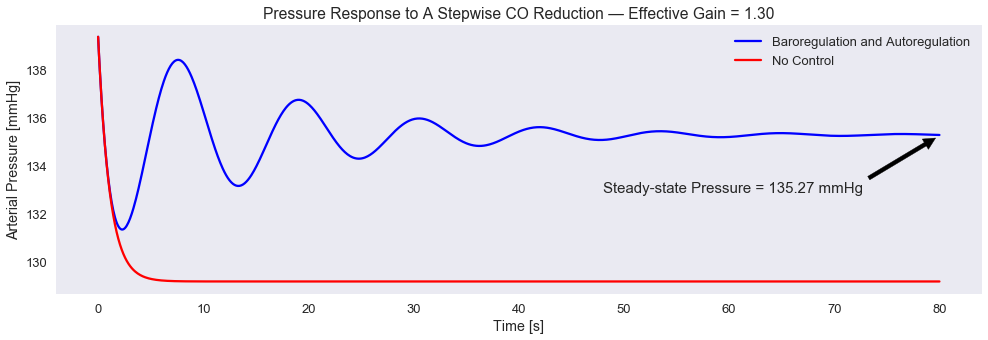

In [8]:
"""
The following code provides an interactive simulation, demonstrating the effect of 
the effective gain "G_0e, the change in the cardiac output "delQ", and the time 
domain. This interactive simulation uses ipywidgets to allow user interaction in 
tuning these parameters.
"""

# The following code imports the necessary widgets from the ipywidget library.
from ipywidgets import interact, fixed

# The function below calls the function "stepResponse" in order to plot the pressure response profile
# based on user-determined values for the effective gain, the step change in cardiac output, and the 
# time domain. "t_end" corresponds with the end of the time interval over which the response is plotted.
def simulation(G_0e = 1.4, delQ = -20, t_end = 80):
    t = np.linspace(0,t_end,1000)
    stepResponse(TF(G_0e)[0], TF(G_0e)[1], TF(G_0e)[2], delQ, t)
    plt.show()

# The code below executes the interface, establishing sliders for the interactive simulation.
interact(simulation, G_0e = (0.01,4,0.01), delQ = (-150,150,1), t_end = (0, 250, 5));

The optimal overall effective gain is 1.39


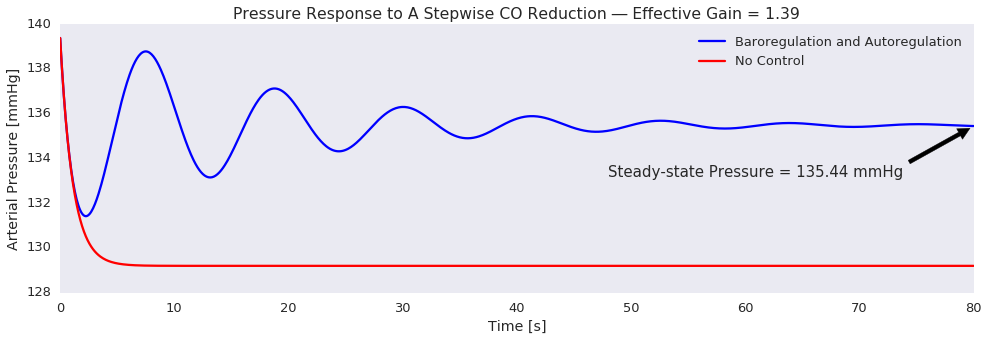


 The Overall Transfer Function Gs =
 
0.2339 s^4 + 4 s^3 + 4.668 s^2 + 1.708 s + 0.54
------------------------------------------------
7.563 s^4 + 16.17 s^3 + 11.86 s^2 + 5.74 s + 2.4


 The Windkessel Arterial Load Transfer Function Ts =
 
0.03402 s + 0.54
----------------
    1.1 s + 1



In [7]:
# The function "gainTuner" returns the value of the optimal gain "optimalG_0e" for the control system
# involving both baroregulation and autoregulation. In the calculation of the optimal gain, it is
# assumed that the oscillatory response and the pressure compensation have equal importance. The
# oscillatory response is quantified from the area of oscillation about the steady-state pressure, and
# the pressure compensation is quantified from how far the steady-state pressure deviates from the 
# set point of 140 mmHg. The oscillatory response is weighted by the condition when "G_0e" is large,
# but not large enough to provide sustained ringing. This upper limit value was determined to be G_0e 
# = 2.5. The pressure compensation is weighted by the condition when there is no control.
# The function has no imputs and returns the value of the maximum gain.

def gainTuner():
    
    # "G_0e_vec" is the vector of gain values from 0 through 2.
    G_0e_vec = np.linspace(0,2.0,201)
    
    # "t" is the time vector, which must have a sufficiently large end value to account
    # for all oscillatory effects and in order to observe a more accurate steady-state
    # pressure.
    t = np.linspace(0,500,1000)
    
    # Vector Initializatioj
    # "pressure_comp_frac" is the vector corresponding with the weighted pressure compensation
    # associated with each gain value.
    pressure_comp_frac = []
    # "=osc_area_frac" is the vector corresponding with the weighted oscillation area
    # associated with each gain value.
    osc_area_frac = []
    # "error_sum" is the vector corresponding with the total error contribution for each gain \
    # value.
    error_sum = []
    
    # The code below calculates the maximum pressure compensation "ss_P_no_control" based
    # on the system without any control.
    delP_no_control,t = control.step(TF(G_0e)[1],t)
    P_no_control = meanP + delP_no_control*delQ
    # The steady state pressure is the last value in the vector.
    ss_P_no_control = P_no_control[-1]
    max_pressure_comp = np.abs(meanP - ss_P_no_control)
    
    # The maximum G_0e without sustained oscillations was determined to be 2.5
    max_osc_G_0e = 2.5
    
    # The code below calculates the maximum area of oscillations "max_osc_area" based 
    # on the system with near-maximal stable gain.
    delP,t = control.step(TF(max_osc_G_0e)[0],t)
    P = meanP + delP*delQ
    ss_P = np.mean(P)
    # Area of oscillations is calculated by the zero-adjusted curve using the trapezoidal
    # rule.
    max_osc_area = np.trapz(np.abs(P-ss_P), dx = t[-1]/len(t))
        
    # The "for loop" iterates through each of the gain values in "G_0e_vec"
    for i in range (0,201):
        # "test_G_0e" is the gain being tested.
        test_G_0e = G_0e_vec[i]
        delP,t = control.step(TF(test_G_0e)[0],t)
        P = meanP + delP*delQ
        ss_P = np.mean(P)
        pressure_comp = np.abs(meanP - ss_P)
        osc_area = np.trapz(np.abs(P-ss_P), dx = t[-1]/len(t))
            
        # The pressure compensation and oscillatory area is weighted against
        # their maximum possible values.
        pressure_comp_frac.append(pressure_comp/max_pressure_comp)
        osc_area_frac.append(osc_area/max_osc_area)
        error_sum.append(pressure_comp_frac[i] + osc_area_frac[i])
        
        
    optimalG_0e = G_0e_vec[np.argmin(error_sum)]

    return optimalG_0e

optimalG_0e = gainTuner()

# Below, the code will display the value of the optimal gain, plot the pressure response
# profile corresponding with this optimal gain, and also display the overall and Windkessel
# transfer functions corresponding with this gain.

print(('The optimal overall effective gain is %.2f' % (optimalG_0e)))

stepResponse(TF(optimalG_0e)[0], TF(optimalG_0e)[1], TF(optimalG_0e)[2], -20, t)
plt.show()

print('\n The Overall Transfer Function Gs =\n', TF(G_0e)[0])
print('\n The Windkessel Arterial Load Transfer Function Ts =\n', TF(G_0e)[1])

These tuning simulations demonstrate the significance of the overall effective gain $G_{0e}$ on the control of the
pressure response. The overall effective gain includes contributions of both baroregulation and autoregulation.
Baroregulation acts to increase $G_{0e}$, and autoregulation counteracts the effects of baroregulation by decreasing 
$G_{0e}$. Therefore, a large value of the overall effective gain corresponds with a system in which baroregulaion 
dominates. If $G_{0e}$ is too large, the system will be overcontrolled and unstable. If $G_{0e}$ is too small, the 
system will have too little control and will approach the system in which no control is implemented. There exists an
optimal value of $G_{0e}$ where the system is adequetely stable yet provides enough of pressure control.

A value of $G_{0e} = 3$ achieves oscillations that recapture the setpoint pressure of 140 mmHg. However, the response
is unstable and, therefore, undesirable. 

A value of $G_{0e} = 2$ is stable and has a small pressure compensation. However, the response still shows some 
oscillatory ringing.

Further decreasing $G_{0e}$ to $1$ decreases the settling time. However, this increase in stability comes at the expense
of an increase in the pressure compensation.

A value of $G_{0e} = 0.1$ shows negligible ringing, but the pressure compensation is almost maximized.

The tuning exercise reveals that there is a trade-off between the oscillatory response and the pressure compensation.
The optimal gain simulation above shows that the optimal value of $G_{0e}$ is about $1.4$. This is consistent with
data collected from Burattini, et al. This optimal gain minimizes the pressure compensation and instability introduced
by baroregulation.

Most notably, this tuning demonstration emphasizes the effect of autoregulation. The arterial blood pressure control
by autoregulation has a two-fold importance: autoregulation reduces the overall effective control gain insofar as to 
minimize the instability introduced by baroregulation, and autoregulation increases the difference between the initial
pressure and the steady-state pressure. This has implications in localized blood pressure regulation. This computational
simluation confirms the theory that autoregulation acts decrease the arterial pressure and its instability in order to 
maintain a constant blood flow rate.

## Comparison of Baroregulation and Autoregulation

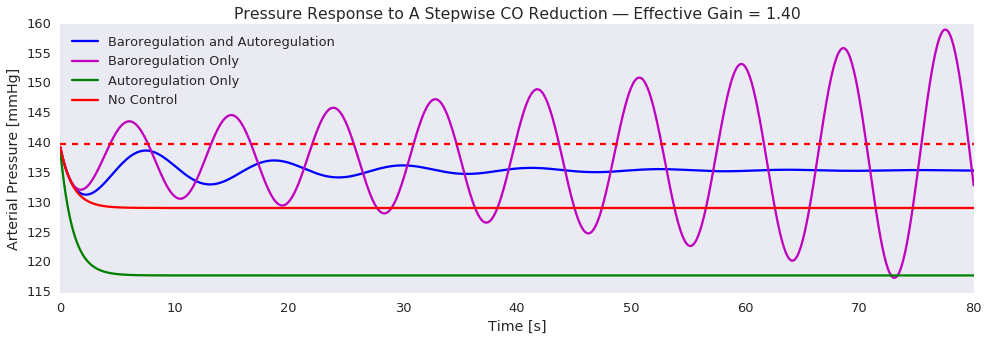

In [8]:
# This simulation will demonstrate the influence of the baroregulation and autoregulation on the control
# of arterial pressure. This model will show the arterial pressure reponse as result of a stepwise change
# in the cardiac output by plotting the pressure profiles for the following conditions: combined 
# baroregulation and autoregulation, baroregulation only, autoregulation only, and no control.

# The function "FullstepResponse" models the arterial pressure profile for conditions when baroregulation 
# and autoregulation are involved, when there is only baroregulation or autoregulation, and when there is
# no regulation at all. The function "TF" is called to return the overall transfer function involving 
# the overall effective gain "G_0e" or the specific baroregulation open-loop gain "G_0b". The function
# returns vectors for the pressure profiles of both baroregulation and autoregulation, no control,
# baroregulation-only control, and autoregulation-only control, respectiveley.
def FullstepResponse(G_0e, delQ, G_0b, G_ra, Q_0, t):
    
    # Gbs is the overall transfer function for baroregulation"-only control, given by the first transfer
    # function returned by the function "TF" for an input of "G_0b"
    Gbs = TF(G_0b)[0]
    
    # "Tas" is the Windkessel arterial load transfer function, which is the only transfer function involved
    # in autoregulation-only control. "Tas" is calcualted by multiplying "R_0 + G_ra*Q_0" by the transfer
    # function "Ts" returned by the function "TF".
    Tas = (R_0 + G_ra*Q_0)*TF(0)[1]
    
    # "delP" is the vector correpsonding with the controlled pressure response, involving the overall
    # transfer function "Gs".
    delP,t = control.step(TF(G_0e)[0],t)
    # "delP_no_control" is the vector correpsonding with an uncontrolled pressure response, involving 
    # only the Windkessel arterial load transfer function "Ts".
    delP_no_control,t = control.step(TF(G_0e)[1],t)
    # "delPb" is the vector correpsonding with the baroregulation-only controlled pressure response, 
    # involving the overall transfer function "Gbs".
    delPb,t = control.step(Gbs,t)
    # "delPa" is the vector correpsonding with the autoregulation-only controlled pressure response,
    # involving only the Windkessel arterial load transfer function "Tas".
    delPa,t = control.step(Tas,t)
    # "Pb" and "Pb" are the pressure profiles that result from the step change to the cardiac output for
    # baroregulation-only, and autoregulation-only control, respectively.
    P = meanP + delP*delQ
    P_no_control = meanP + delP_no_control*delQ
    Pb = meanP + delPb*delQ
    Pa = meanP + delPa*delQ
    
    return P, P_no_control, Pb, Pa

# This function plots the pressure response for inputs of vectors for the pressure profiles of both 
# baroregulation and autoregulation, no control, baroregulation-only control, and autoregulation-only 
# control, respectiveley.
def plotFullstepResponse(P, P_no_control, Pb, Pa):
        
    # The following code plots the pressure profiles for both the controlled and uncontrolled systems
    # over the given time domain.
    plt.figure(figsize=(14,5))
    plt.plot(t,P,'b')
    plt.plot(t,Pb,'m')
    plt.plot(t, Pa,'g')
    plt.plot(t, P_no_control,'r')
    # A baseline for the mean arterial pressure will be plotted for comparison
    plt.plot([0, t[-1]],[meanP, meanP],'r--')
    plt.ylabel('Arterial Pressure [mmHg]')
    plt.xlabel('Time [s]')
    if delQ <= 0:
        legend_loc = 'upper left'
    if delQ > 0:
        legend_loc = 'lower left'
    plt.legend(['Baroregulation and Autoregulation', 'Baroregulation Only', 
                'Autoregulation Only', 'No Control'], loc = legend_loc)
    plt.title('Pressure Response to A Stepwise CO Reduction — Effective Gain = %.2f' % (G_0e))
    plt.grid()
    plt.tight_layout()


# Open-Loop Transfer Function Parameters taken from Burattini, et al.
# The values reflect steady-state canid conditions, except for the
# nominal flow rate "Q_0", which reflects steady-state feline conditions.
#Effective baroreflex open-loop gain
G_0e = 1.4      #dimensionless
#Specific baroregulation open-loop gain
G_0b = 3.3      #dimensionless
#Autoregulation resistance gain
G_ra = 20.3e-3  #mmHg min^2 kg^2 ml^−2
#Nominal blood flow rate
Q_0 = 144/1.94  #from cat data (P_o/R_o) [mL min^-1]
delQ = -20    #mL min^-1

#"t" is the time vector consisting of 1,000 points from 0 to 80 seconds
t = np.linspace(0,80,1000)

# For this simulation, the same stepwise change in the flow rate ("delQ") will
# be observed. 
P, P_no_control, Pb, Pa = FullstepResponse(G_0e, delQ, G_0b, G_ra, Q_0, t)
plotFullstepResponse(P, P_no_control, Pb, Pa)

This simulation isolates the effect of baroregulation and the effect of autoregulation, in comparison with the 
system involving both methods of arterial pressure control. 

The blue cuve shows the response with both methods of regulation, showing a minimized pressure compensation and 
a quick path to steady state.

The magenta curve shows the baroregulation-only response, which creates instability as it attempts to reach the set 
point of 140 mmHg. The baroregulation-only response resembles the system with excess control gain, indicating that
baroregulation is the control mechanism that acts to increase the arterial pressure. This attempt to restore the 
arterial pressure has the cost of introducing instability.

The green curve depicts autoregulation-only control. It is important to notice that this response falls below the 
red curve—the control-less system. This indicates that baroregulation attempts to further increase the response 
introduced by the cardiac output change. In this situation, autoregulation acts to further decrease the pressure.


Again, this simulation mathematically confirms that autoregulation counteracts the attempt to increase the arterial 
pressure by baroregulation. This simulation also demonstrates that autoregulation reduces instability introduced by 
baroregulation. This simulation demonstrates the significance of autoregulation in the baroreflex feedback control 
model, showing how autoregulation acts to decrease the overall effective gain. Therefore, it is important to consider autoregulation when modeling pressure regulation. This model shows that baroregulation, alone, cannot fully describe
the arterial blood pressure respone to a cardiac output disturbance. This model improves previous models that
exclusively demonstrate baroregulation.

## Modeling Baroregulation and Autoregulation Control with a PID conroller

The psyiological process of blood pressure regulation performed by the baroreflex and autoregulation mechanisms, is fundamentally an algorithm that makes use of negative feedback control. Although their objectives are conflicting, the sum of the effects of baroreflex and autoregulation can be modeled by a single transfer function ($H(s)$ in a feedback loop. The purpose of this section is create an alternative, artificial "controller" that replaces $H(s)$ with a transfer function that utilizes common PID control. 

In order to more easily implement the PID controller, it was helpful to write the block diagram in a more conventional form for  closed loop negative feedback. To simulate the dynamics of physiological control and account for the pressure sensing process, a second order time delay ($G_m$) was inserted into the feedback loop. $H(s)$ was replaced with a function to model PID and the change in cardiac output ($\Delta Q$) was interpreted as a disturbance variable with an effect on arterial pressure ($\Delta P$) modeled by the same transfer function $T(s)$. Although this model is rather simple, it can still provide insight into designing possible future biotechnology that can regulate aterial pressure for those who have deficient baroreflex. With these changes the previous block diagram from Burattini $et \space al.$ can be rewritten as the following...

![](PIDBlockDiagram2.PNG)


Here we create a transfer function for the PID controller:

 $$ G_c^{PID}(s) = K_c\left[1 + \frac{1}{\tau_I s} + \frac{\tau_D s}{\alpha \tau_D s + 1}\right] $$

The function allows inputs for the proportial gain ($K_c$), the derivative time constant ($\tau_D$), and the integral constant ($\tau_I$). By setting the appropriate parameters to 0, one can modify the function for P, PD, and PI control.

In [9]:
def PID(Kc=1,tauI=0,tauD=0):
    alpha = 0.1 # this parameter is usually set around 0.1 to filter out noise from being acted on by derivative action
    Gc = control.tf([1],[1])
    if tauI != 0:
        Gc += control.tf([1],[tauI,0])
    if tauD != 0:
        Gc += control.tf([tauD,0],[alpha*tauD,1])
    return Kc*Gc

In [10]:
## Modeling

# Here we use a second order time delay to represent the dynamics of the physiological model. The time delay can be approximated 
# in transfer function form using the Pade approximation. The time delay is given a value of 1.1 seconds to be consistent with
# the similar value of tau_1 used by Burattini et al. in their function for H(s).
num,den = control.pade(1.1,2)
Gm = control.tf(num,den)

# The following function is used to plot the effect of a step change in the disturbance variable (Q) on the controlled variable (P).
# It models the effects of the D --> Y closed loop transfer function of the newly written block diagram. The inputs include the 
# magnitude of the step change in the disturbance variable (delQ), the transfer fucntion for the disturbance variable (Gd), the 
# open-loop transfer function (G_OL), a vector for the timeframe (t), and the axes handle (ax) with which to plot to.
def plotStepResponse(delQ,Gd,G_OL,t,ax):
    y,t = control.step(Gd/(1+G_OL),t)
    P = meanP + y*delQ
    ax.plot(t,P)
 

##### Zeigler-Nichols Tuning

First, the controller is tuned according to the Ziegler-Nichols method. The closed loop transfer function for the Disturbance responce is plotted, the integral and derivitive control action is turned off on the controller, and $K_c$ is varied until continuous oscillations occur. At this point, the ultimate gain ($K_{cu}$) is the current gain and the ultimate period ($P_u$) is the period of the continuous oscillations.

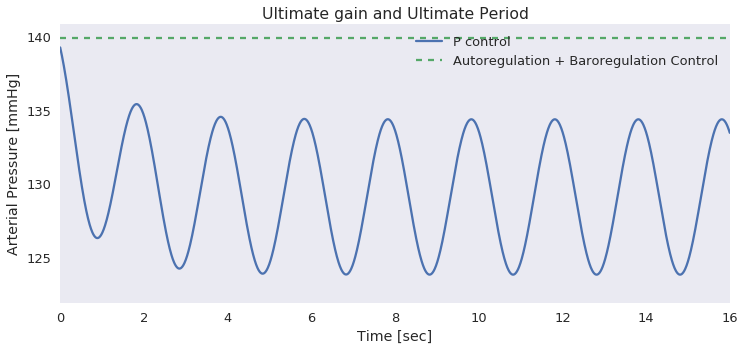

In [11]:
# Z-N tuning

# Parameters
delQ = -40  #mL/min
G_0e = 1.4  # dimensionless

t = np.linspace(0,16,2000) # sec

# Create figure and handle for axes
plt.figure(figsize=(12,5))
axes = plt.gca()

# Visualize
plotStepResponse(delQ,TF(G_0e)[1],PID(1,0,0)*Gm,t,axes)
axes.plot([t[0],t[-1]],[meanP,meanP],'--')
axes.set_ylim(ymax = meanP + 1)
axes.set_xlabel('Time [sec]')
axes.set_ylabel('Arterial Pressure [mmHg]')
axes.set_title('Ultimate gain and Ultimate Period')
axes.legend(['P control','Autoregulation + Baroregulation Control','Initial Pressure'],loc='upper right')
axes.grid()

After manually varying $K_c$, it is graphically determined that the $K_{cu} = 1$ and $P_u = 2 sec$. This gives the following parameter values for PID, PD, and P control:

PID control:
$$K_c = 0.6(K_{cu} = 0.6(1) = 1$$
$$\tau_I = P_u/2 = 2/2 = 1 \space sec$$
$$\tau_D = P_u/8 = 2/8 = 0.25\space sec$$

PD Control:
$$K_c = 0.8(K_{cu} = 0.8(1) = 0.8$$
$$\tau_D = P_u/8 = 2/8 = 0.25 \space sec$$

P Control:
$$K_c = 0.8(K_{cu} = 0.8(1) = 0.8$$

### PID Control

First we examine the effects of PID control using the Z-N tuned parameters calculated above. A step decease of 45 ml/min in cardiac ouput ($\Delta Q$) is applied to the cardiovascular system and the arterial pressure response is observed. The effects of the artificial controller are compared to the control of baroreflex and autoregulation with the experimentally determined effective open-loop gain ($G_{oe}$) of 1.4 (Burattini et al.)

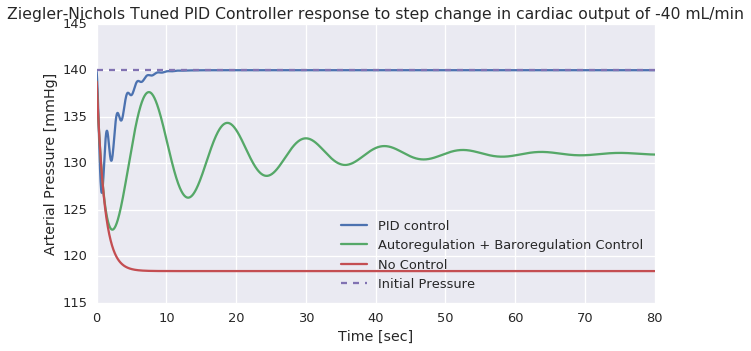

In [12]:
# Z-N tuned PID control

# These parameters are defined again in case user wants to change values.
delQ = -40  #mL/min
G_0e = 1.4  # dimensionless
G_0b = 3.3      #dimensionless
G_ra = 20.3e-3  #mmHg min^2 kg^2 ml^−2
Q_0 = 144/1.94  #from cat data (P_o/R_o) [mL min^-1]
t = np.linspace(0,80,2000) # sec

# Create figure and handle for axes
plt.figure(figsize=(10,5))
axes1 = plt.gca()

# Here we collect the natural/physiological responces of pressure (as shown before) to add to the following graphs
P,Pi,Pia,Pib = FullstepResponse(G_0e, delQ, G_0b, G_ra, Q_0, t)

# Visualize
plotStepResponse(delQ,TF(G_0e)[1],PID(0.6,1,0.25)*Gm,t,axes1)
axes1.plot(t,P,t,Pi,[t[0],t[-1]],[meanP,meanP],'--')
axes1.set_xlabel('Time [sec]')
axes1.set_ylabel('Arterial Pressure [mmHg]')
axes1.set_title('Ziegler-Nichols Tuned PID Controller response to step change in cardiac output of %(number)s mL/min'  % {'number':delQ})
axes1.legend(['PID control','Autoregulation + Baroregulation Control','No Control','Initial Pressure'],loc='lower right')


A Z-N tuned PID conroller appears to do fairly well at restoring the arterial pressure to its original value. The initial pressure is regained within about 12 seconds, however lowering the integral time constant even more (to about 0.5) creates a faster return to the nominal pressure value with minimal side effects. However, it is important to note that regaining the original pressure, while beneficial for baroreflex, is problematic for autoregulation which wants to dilate blood vessels (decreaseing the pressure) to maintain constant blood flow. To meet of the objectives of both regulatory mechanisms, a control function that relaxed the pressure slightly (as is seen naturally) would be more effective. For this approach, the eliminaltion of integral control, as in P or PD control, would be more appropriate.

### P Control

Next, Z-N tuned P control is observed versus the natural response for the same values of $\Delta Q$ and $G_{oe}$

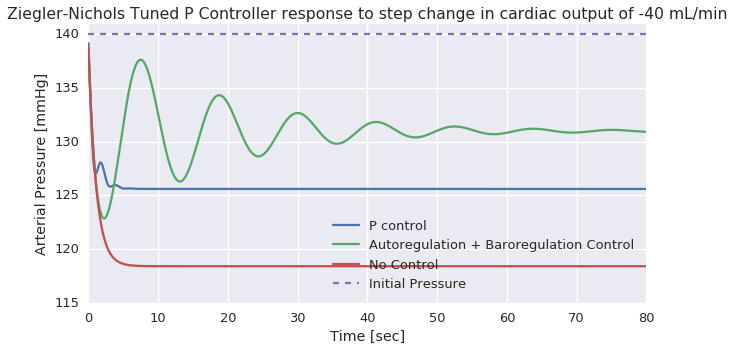

In [13]:
# Z-N tuned P control  

# These parameters are defined again in case user wants to change values.
delQ = -40  #mL/min
G_0e = 1.4  # dimensionless
G_0b = 3.3      #dimensionless
G_ra = 20.3e-3  #mmHg min^2 kg^2 ml^−2
Q_0 = 144/1.94  #from cat data (P_o/R_o) [mL min^-1]
t = np.linspace(0,80,2000)

# Create figure and get axes handle
plt.figure(figsize=(10,5))
axes3 = plt.gca()

# Here we collect the natural/physiological responces of pressure (as shown before) to add to the following graphs
P,Pi,Pia,Pib = FullstepResponse(G_0e, delQ, G_0b, G_ra, Q_0, t)

# Z-N tuned P control  
plotStepResponse(delQ,TF(G_0e)[1],PID(.5,0,0)*Gm,t,axes3)
axes3.plot(t,P,t,Pi,[t[0],t[-1]],[meanP,meanP],'--')
if delQ < 0:
    axes3.set_ylim(ymax = meanP + 1)
else:
    axes3.set_ylim(ymin = meanP - 1)
axes3.set_xlabel('Time [sec]')
axes3.set_ylabel('Arterial Pressure [mmHg]')
axes3.set_title('Ziegler-Nichols Tuned P Controller response to step change in cardiac output of %(number)s mL/min'  % {'number':delQ})
axes3.legend(['P control','Autoregulation + Baroregulation Control','No Control','Initial Pressure'],loc='lower right')

The Z-N tuned P Control, while minimizing oscillations, does a poor job of reaching the steady state pressure value that the natural response does. Increasing $K_c$ has the effect of raising the steady state pressure but with the disadvantage of increased oscillations. In fact, gains above 1 cause the controller to create a unstable oscillatory response. In order to be able to use a higher gain, it is necessary to use PD control to mitigate the oscillations.

### PD Control

Switching to PD control, offers the opportunity to minimize the oscillations in the control response. However after trial of Z-N tuned PD controller it was apparent that while the response was stable at higher gains, a significant amount of high frequency ringing was still present. In response to this, a second-order filter was added to the PD conroller transfer function to reduce the "kick" of derivitive action (Kantor). 

$$ G_c^{mod}(s) = K_c\left[1 + \frac{\tau_D s}{\alpha \tau_D s + 1}\right]\left[\frac{1}{\tau_n s + 1}\right]^2 $$

To tune this controller, the gain $K_c$ was increased untill the steady stated response matched that of the natural physiological response. Then the parameter $\tau_n$ was increased untill the ringing had dissipated significantly and the response of the controller took on a similar shape to that of the natural response.

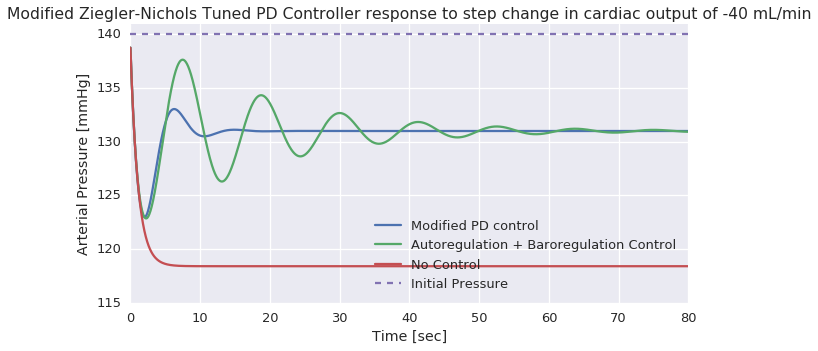

In [14]:
# Modified Z-N tuned PD control

# These parameters are defined again in case user wants to change values.
delQ = -40  #mL/min
G_0e = 1.4  # dimensionless
G_0b = 3.3      #dimensionless
G_ra = 20.3e-3  #mmHg min^2 kg^2 ml^−2
Q_0 = 144/1.94  #from cat data (P_o/R_o) [mL min^-1]
t = np.linspace(0,80,2000)

#Create figure and handle for axes
plt.subplots(figsize=(10,5))
axes2 = plt.gca()

# Here we collect the natural/physiological responces of pressure (as shown before) to add to the following graphs
P,Pi,Pia,Pib = FullstepResponse(G_0e, delQ, G_0b, G_ra, Q_0, t)

# Create second order filter
taun = 1.8     # sec
Fs = (control.tf([1],[taun,1]))**2

# Visualize
plotStepResponse(delQ,TF(G_0e)[1],PID(1.4,0,0.25)*Gm*Fs,t,axes2)
axes2.plot(t,P,t,Pi,[t[0],t[-1]],[meanP,meanP],'--')
if delQ < 0:
    axes2.set_ylim(ymax = meanP + 1)
else:
    axes2.set_ylim(ymin = meanP - 1)
axes2.set_xlabel('Time [sec]')
axes2.set_ylabel('Arterial Pressure [mmHg]')
axes2.set_title('Modified Ziegler-Nichols Tuned PD Controller response to step change in cardiac output of %(number)s mL/min'  % {'number':delQ})
axes2.legend(['Modified PD control','Autoregulation + Baroregulation Control','No Control','Initial Pressure'],loc='lower right')



This version of the PD control does very well at modeling the actual physiological response. In fact, it reaches the natural steady state pressure significantly faster than the physiological response without unwanted high frequency ringing. One interesting observation is that when the steady state pressure of the PD controller response matches the physiological steady state, the gain of the conroller $K_c$ is equal to the physiological gain $G_{oe}$. It should be noted that if $G_{oe}$ were changed for the physiological model, the PD controller would have to be re-tuned, however the current effective gain of 1.4 was the most common gain measured in the cats and dogs studied by Burattini. Despite the simplicity of the PD model, it shows that it might be possible, given the right technology, to artificially model the response of baroreflex and autoregulation.

## Bode Plot Analysis

To have a more robust analysis of the stability of the physiological model of baroreflex and autoregulation, we examine the Bode Plots of the open-loop transfer function for the physiological model. The Bode Stability criterion states that, for the Bode Plot of the open-loop transfer function of a model, if the amplitude ratio at the crossover frequency ($\omega_c$) is less than unity, then the closed loop system is stable. Otherwise it is not stable. The open-loop transfer function for the physiological model is $H(s)$ which we examine over a range of effective open-loop gains below.

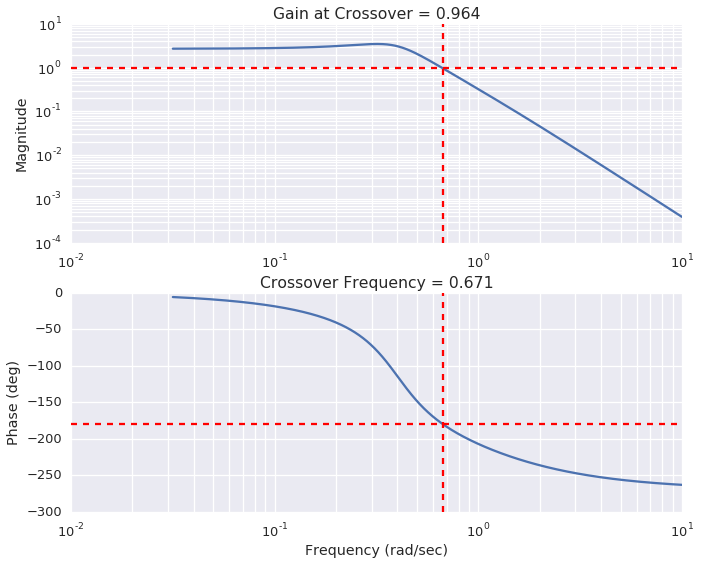

In [15]:
def simulateBode(G_0e = 2.8):
    omega = 0.4 #natural frequency s^-1

    x = np.logspace(-1.5,1,2000)

    # Create Bode Plots
    plt.figure(figsize=(10,8))
    mag,phase,omega = control.bode(TF(G_0e)[3],x)
    plt.tight_layout()
    
    # Calculate the crossover frequence (wc) and gain at crossover frequency (gc)
    wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
    gc = np.interp(wc,omega,mag)
    
    # get the subplots axes
    ax1,ax2 = plt.gcf().axes

    # add features to the magnitude plot
    plt.sca(ax1)
    [omin,omax]= plt.xlim()
    plt.plot([omin,omax],[gc,gc],'r--')
    [gmin,gmax] = plt.ylim()
    plt.plot([wc,wc],[gmin,gmax],'r--')
    plt.title("Gain at Crossover = {0:.3g}".format(gc))

    # add features to the phase plot
    plt.sca(ax2)
    plt.plot([omin,omax],[-180,-180],'r--')
    [pmin,pmax] = plt.ylim()
    plt.plot([wc,wc],[pmin,pmax],'r--')
    plt.title("Crossover Frequency = {0:.3g}".format(wc))
    
    
from ipywidgets import interact, fixed
interact(simulateBode,G_0e = (0.01,5,0.1));

Under the conditions of nominal effective open loop gain of 1.4, $AR(\omega_c) = 0.498$, indicating that the sytem is stable. This is consistent with the graphs of the overall closed loop transfer function which shows a damped oscillation. If $G_{oe}$ is increased to 1.81, $AR(\omega_c) = 1$ and the system is marginally stable. Values of $G_{oe}$ above this value cause the system to be unstable. This is also consistent with graphical observation of the physiological response, which shows sustained oscillations of constant magnitude at $G_{oe}$ values around 2.8, and instablility beyond this. This means that for the physiological response, their is a limit to the degree to which pressure compensation can be mitigated after a step change in disturbance to the system.

## Effects of Time Delay on Baroreflex and Autoregulation

Finally, we examine the effects of an additional time delay in the negative feedback loop of the physiological model. This could be due to damaged nerves or some other obstacle to quickly measuring the pressure of the arteries. This will be a way to examine the robustness of the physiological model and anticipate how it will adapt to such an obstacle. To impement a time telay, a transfer function for a first order Pade approximation was added to the block diagram immediately before $H(s)$. Although $H(s)$ most likely already accounts for the dynamics of some inherent physiological time delay, this will simulate a further obstacle to the sensing or acting mechanisms of baroreflex and autoregulation.

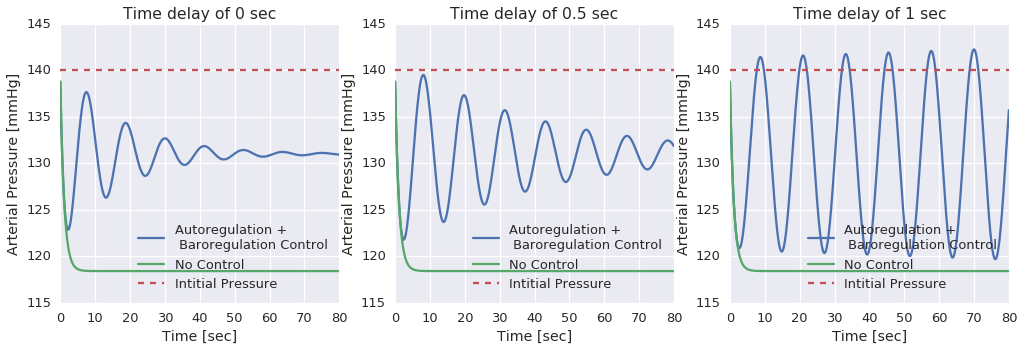

In [16]:
## Effects of Time delay on Autoregulation/Baroregulation Control

# This function takes in the step change in cardiac output (delQ) in mL/min, the effective open-loop gain G_oe, and a vector 
# of various time delays to plot (t_delay)
def TimeDelay(delQ,G_0e,t_delay):
    t = np.linspace(0,80,2000)
    n = len(t_delay)
    i=1
    plt.subplots(figsize=(17,5))
    for time in t_delay:
        plt.subplot(1,n,i)
        i += 1
        #plt.figure(figsize=(10,5))
        ax = plt.gca()
        num,den = control.pade(time,1)
        Gm = control.tf(num,den)
        plotStepResponse(delQ,TF(G_0e)[1],TF(G_0e)[3]*Gm,t,ax)
        y_nocontrol = FullstepResponse(G_0e,delQ,G_0b,G_ra,Q_0,t)[1]
        ax.plot(t,y_nocontrol,[t[0],t[-1]],[meanP,meanP],'--')
        ax.set_ylim(ymax=meanP+5)
        ax.set_xlabel('Time [sec]')
        ax.set_ylabel('Arterial Pressure [mmHg]')
        ax.set_title('Time delay of %(number)s sec'  % {'number':time})
        ax.legend(['Autoregulation + \n Baroregulation Control','No Control','Intitial Pressure'],loc='lower right')

    
TimeDelay(-40,1.4,[0,0.5,1])

The preceding control responses were plotted for a disturbance step change of -40 ml/min in cardiac output and with the nominal $G_{oe}$ of 1.4. The first graph shows the response with no additional time delay (ie. the original response). With a time delay of 0.5 seconds, the oscillations grow significantly and the system no longer reaches a steady state pressure after 70 seconds. Further increasing the delay to 1 second makes the system marginally unstable. In order to adapt to this delay, the physiological response must have lower effective gain, which allows for increased damping of the oscillations, but has the side effect of a greater pressure compensation. This will negatively impact the objective of baroreflex and perhaps lead to inability to effectively maintain safe levels of blood pressure.

## Conclusions

Baroreflex and autoregulation combine to regulate the effects of blood pressure drop due to decreases in cardiac output. Baroreflex control is characterized by minimal offset, but large oscillation, whereas autoregulation is characterized by large proportional control with little oscillation, but significant offset. When combined, the effects of baroreflex on blood pressure regulation are slightly more pronounced than those of autoregulation. Tuning the model provided by Burattini in addition to using the optimization algorithm yielded an optimal effective gain of 1.39, indicating that slightly more baroreflex control than autoregulation control provides the optimal tradeoff between blood pressure offset and instability. 

Implementation of control algorithms indicated that proportional-derivative control provides the best fit for this biological control system. PID control eliminated the desired blood pressure offset in response to the cardiac output change, which biologically could lead to hypertension. Proportional only control provided an offset, but only stabilized blood pressure  for values of the effective gain less than 1. Proportional-derivative control stabilized blood pressure over a larger range of effective gains, while also yielding a pressure offset proportional to the cardiac output decrease. Additionally, the implementation of a time delay led to increased oscillatory amplitudes, confirming that immediate feedback action by baroreflex and autoregulation are essential for effective blood pressure regulation.

Failure of baroreflex causes detrimental symptoms in patients. Baroreflex failure is commonly caused by injury or radiation to the throat. Baroreflex failure is characterized by surges of severe hypertension and tachycardia, a condition where heart rates increase over 30 bpm when changing from supine to standing positions (Ketch). Baroreflex failure is not as prevalent as its characteristic symptoms because it can be misdiagnosed for common diseases such as anxiety disorders to severe diseases such as pheochromocytoma, an adrenal tumor that causes lethal hypertension (Ketch). However, if properly diagnosed, baroreflex failure can be treated using pharmaceuticals with adrenoreceptor agonists can be used to reduce the frequency of blood pressure surges. Current medical research is focused on the implications of a bionic baroreflex system (Ketch).


## References

Baroreceptor human diagram. Digital image. Alila Medical Media. Alila Medical Media, 2017. Web. 30 Apr. 2017.

Batzel, Jerry J. Cardiovasular and Respiratory Systems: Modeling, Analysis, and Control. Philadelphia: Society for Industrial and Applied Mathematics, 2007. Print.

Burattini, Roberto, Piet Borgdorff, and Nico Westerhof. "The Baroreflex Is Counteracted by Autoregulation, Thereby Preventing Circulatory Instability." Experimental Physiology 89.4 (2004): 397-405. The Physiological Society, 6 May 2004. Web. 19 Apr. 2017.

Burattini, Roberto, Piet Borgdorff, David R. Gross, Bruna Baiocco, and Nicolaas Westerhof. Systemic Autoregulation Counteracts the Carotid Baroreflex. Publication. 1st ed. Vol. 38. Ancona, Italy: U of Ancona, 1991. Print. IEEE Transactions on Biomedical Engineering.

Kantor, Jeffery, PhD. Baroreflex as a Linear Control System. Jupyter CBE 30338 Github. Jeffery Kantor, 2017. Web. 18 Apr. 2017.

Ketch, Terry, Italo Biaggioni, Rose Marie Robertson, and David Robertson. "Four Faces of Baroreflex Failure." American Heart Association. American Heart Association, 13 Mar. 2002. Web. 3 May 2017.

Klabunde, Richard E., PhD. "Systemic Vascular Resistance." Cardiovascular Physiology Concepts, Richard E Klabunde PhD. Marian University College of Osteopathic Medicine, 6 Dec. 2016. Web. 19 Apr. 2017.
